# TECHNICAL SUPPORT

In [1]:
# Analysing Technical support data on problem types , time to of resolve problem and channel of support 

In [2]:
#IMPORT LIBRARIES 

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline 

import seaborn as sns

from sklearn.cluster import KMeans

from scipy.stats import zscore

import warnings 
warnings.simplefilter('ignore')

In [3]:
# LOADING DATASET

tech_supp_df = pd.read_csv("technical_support_data.csv")

In [4]:
tech_supp_df.shape

(23, 8)

In [5]:
tech_supp_df

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5


In [6]:
tech_supp_df.head(5)

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [7]:
techSuppAttr = tech_supp_df.iloc[:,1:]
techSuppScaled = techSuppAttr.apply(zscore)# scaling out database

In [8]:
techSuppScaled

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572


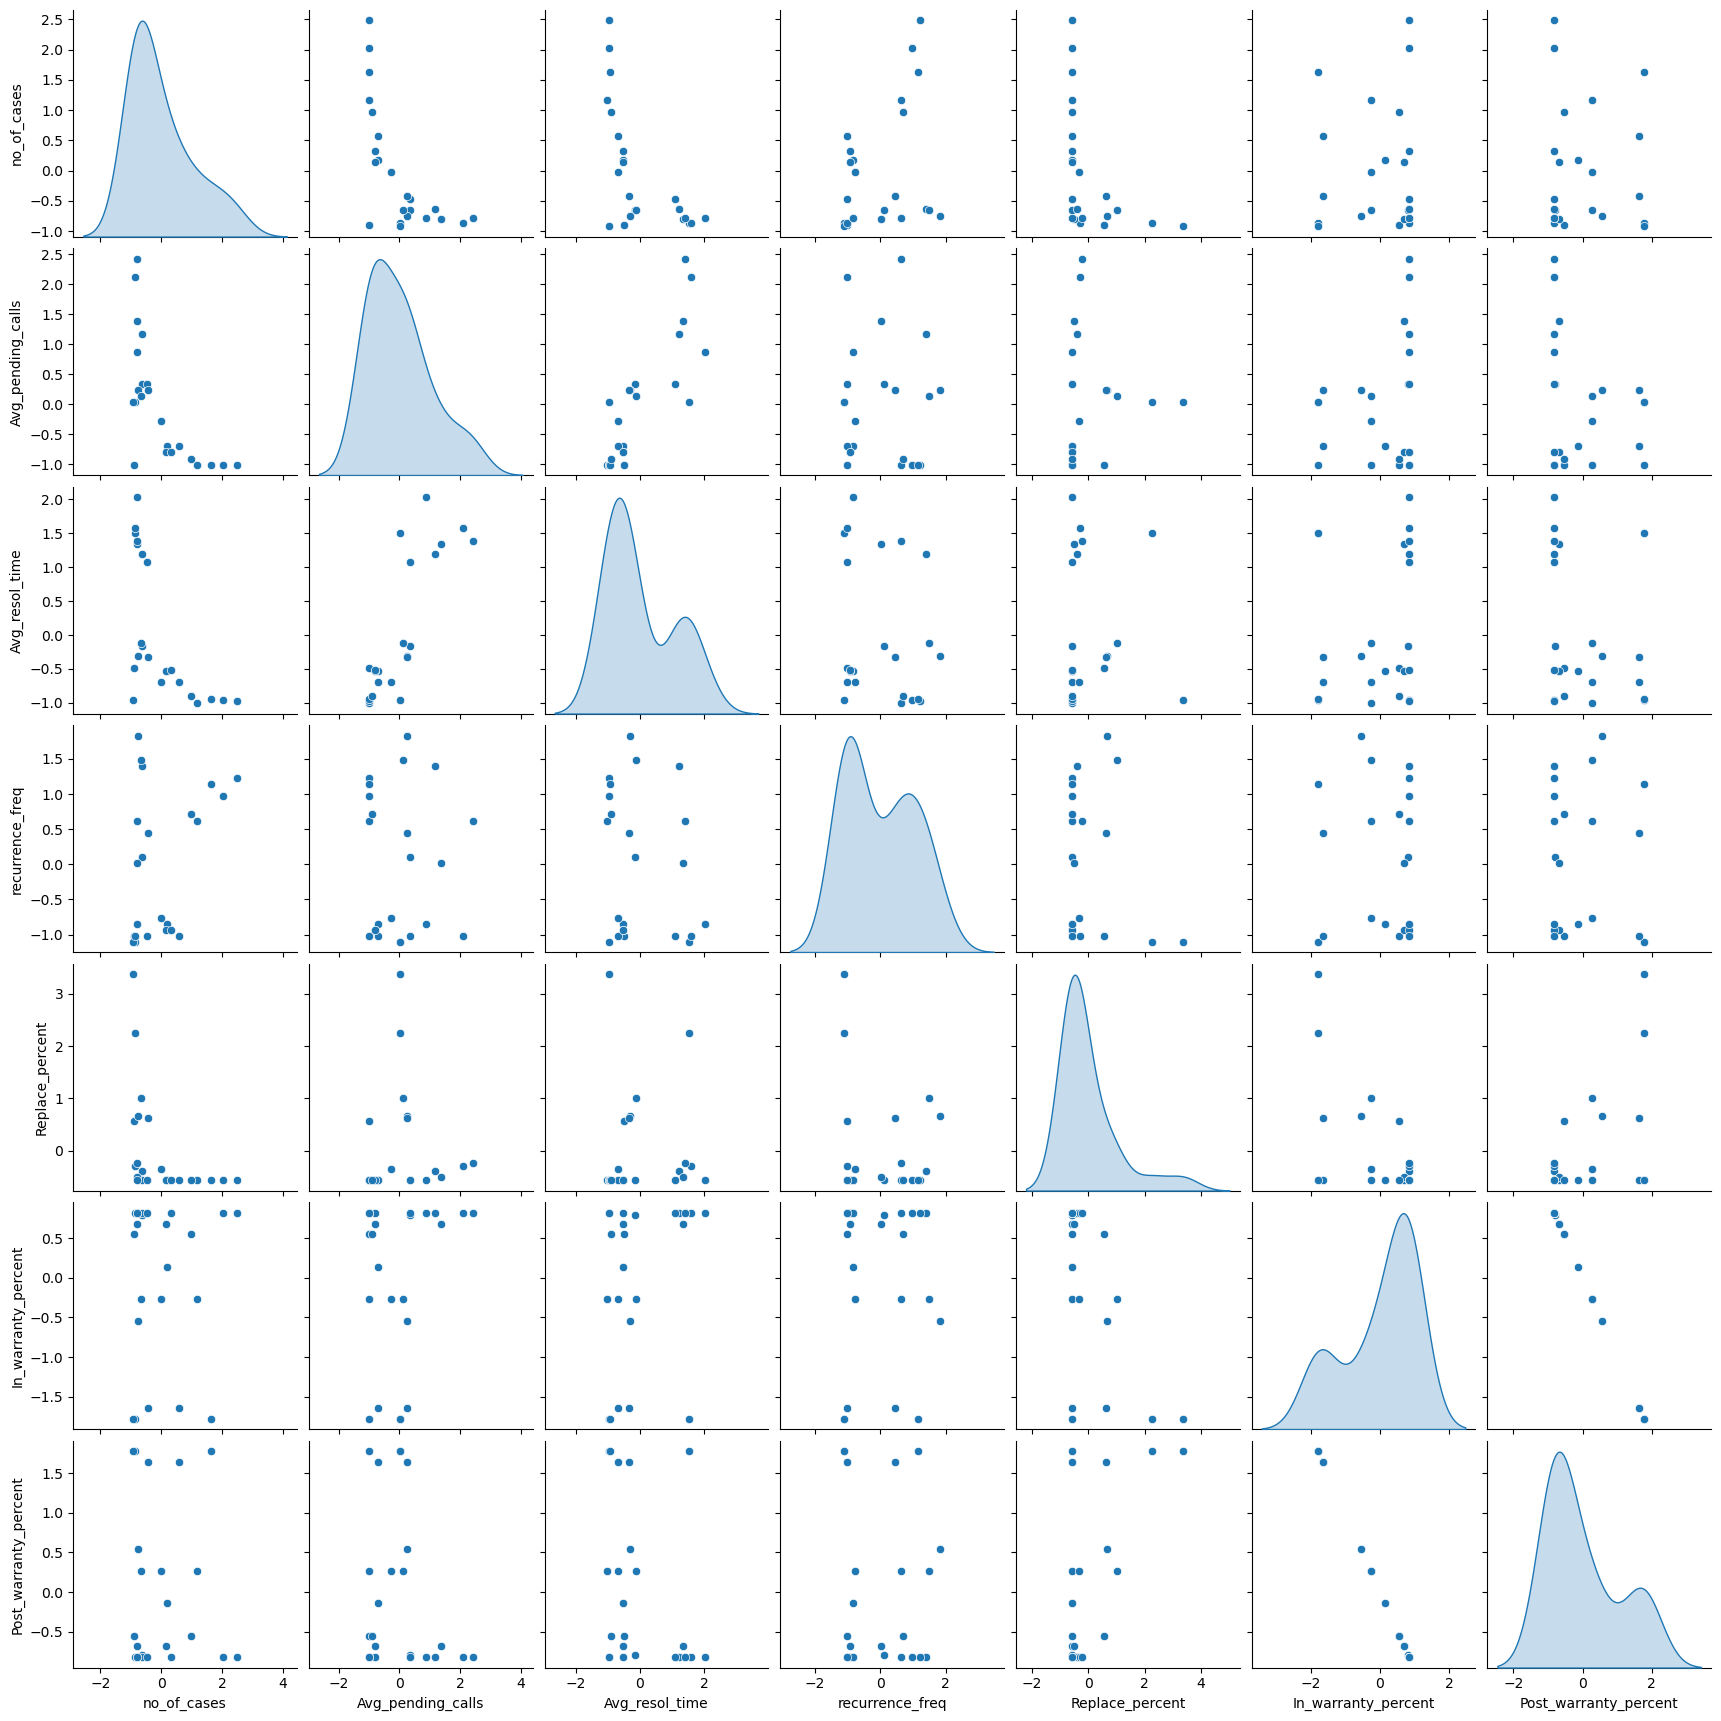

In [9]:
sns.pairplot(techSuppScaled,diag_kind='kde')

In [10]:
# GROUPING DATA INTO SIMILAR CLUSTERS

In [11]:
# The elbow method 

In [12]:
OMP_NUM_THREADS=1
from scipy.spatial.distance import cdist  # compute distance between each pai of 2 colletion of imputs 
clusters = range(1,10)
meanDistortion=[]


for k in clusters :  
    model = KMeans(n_clusters=k)
    
    model.fit(techSuppScaled)
    prediction = model.predict(techSuppScaled)
    
    meanDistortion.append(sum(np.min(cdist(techSuppScaled,model.cluster_centers_,'euclidean'),axis=1))/techSuppScaled.shape[0])

In [13]:
meanDistortion

[2.5132186215720433,
 2.011069807948648,
 1.6368266300358518,
 1.4661262666709103,
 1.219279020313038,
 1.0620842732423292,
 0.9815040637871222,
 0.8636657490946983,
 0.7915263556553995]

Text(0.5, 1.0, 'Selecting k with elbow method')

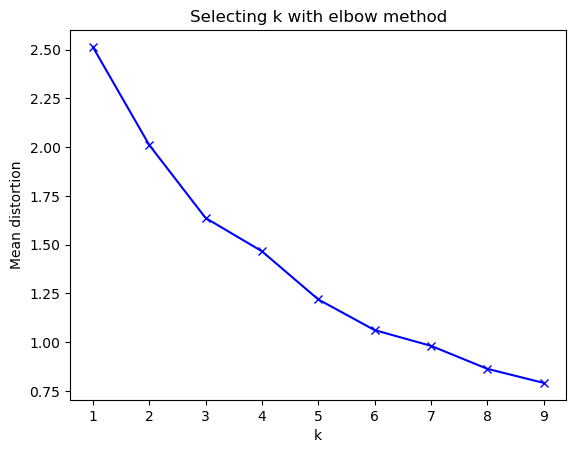

In [14]:
plt.plot(clusters,meanDistortion,'bx-')
plt.xlabel('k')
plt.ylabel('Mean distortion')
plt.title("Selecting k with elbow method")

In [15]:
# K = 3 ( ELBOW METHOD)

In [16]:
final_model = KMeans(3)
final_model.fit(techSuppScaled)
prediction = final_model.predict(techSuppScaled)

In [17]:
# Append the prediction 

tech_supp_df['Clusters']= prediction
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [18]:
tech_supp_df[tech_supp_df['Clusters'] == 0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,0
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,0
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,0


In [19]:
tech_supp_df[tech_supp_df['Clusters'] == 1]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,1
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,1
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,1
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,1
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,1
14,Remote Keys get stuck,450,1.0,8,0.25,0.00,100,0,1
15,Unable to operate menu from remote,520,1.0,7,0.28,0.00,100,0,1
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,1
19,WIFI connectivity breaks,290,1.1,11,0.22,0.00,90,10,1


In [20]:
tech_supp_df[tech_supp_df['Clusters'] == 2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,2
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,2
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,2
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,2
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50,2
21,Battery does not last full 8 hrs,43,2.1,56,0.31,0.28,60,40,2
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90,2


In [21]:
# K = 5 ( ELBOW METHOD)

In [22]:
final_model1 = KMeans(5)
final_model1.fit(techSuppScaled)
prediction1 = final_model1.predict(techSuppScaled)

In [23]:
# Append the prediction 

tech_supp_df['Clusters1']= prediction1
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters,Clusters1
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1,3
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1,3
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0,3


In [24]:
tech_supp_df[tech_supp_df['Clusters1'] == 0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters,Clusters1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0,0
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,0,0
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,0,0
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,0,0


In [25]:
tech_supp_df[tech_supp_df['Clusters1'] == 1]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters,Clusters1
8,Unable to connect the App to the device,321,1.0,5,0.21,0.0,60,40,1,1
14,Remote Keys get stuck,450,1.0,8,0.25,0.0,100,0,1,1
15,Unable to operate menu from remote,520,1.0,7,0.28,0.0,100,0,1,1
19,WIFI connectivity breaks,290,1.1,11,0.22,0.0,90,10,1,1


In [26]:
tech_supp_df[tech_supp_df['Clusters1'] == 2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters,Clusters1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2,2
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2,2


In [27]:
tech_supp_df[tech_supp_df['Clusters1'] == 3]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters,Clusters1
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,1,3
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,1,3
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0,3
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,1,3
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,1,3
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,1,3


In [28]:
tech_supp_df[tech_supp_df['Clusters1'] == 4]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters,Clusters1
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,2,4
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,2,4
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50,2,4
21,Battery does not last full 8 hrs,43,2.1,56,0.31,0.28,60,40,2,4
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90,2,4
